In [19]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import pandas as pd
import os
tf.compat.v1.disable_eager_execution()
from sklearn.preprocessing import MinMaxScaler
tf.__version__

'2.4.1'

In [20]:
df=pd.read_csv('/home/nusa/Documents/ProjectBangkit2021/data/Merged3.1.csv')

In [21]:
df

,tanggal,pm10,so2,co,o3,no2,max,critical,categori,lokasi_spku
0,1/1/2010,60,4,73.0,27,14,73,CO,SEDANG,JAKARTA
1,1/2/2010,32,2,16.0,33,9,33,O3,BAIK,JAKARTA
2,1/3/2010,27,2,19.0,20,9,27,PM10,BAIK,JAKARTA
3,1/4/2010,22,2,16.0,15,6,22,PM10,BAIK,JAKARTA
4,1/5/2010,25,2,17.0,15,8,25,PM10,BAIK,JAKARTA
...,...,...,...,...,...,...,...,...,...,...
4083,3/27/2021,62,49,13.0,63,33,91,PM25,SEDANG,JAKARTA
4084,3/28/2021,57,43,15.0,71,31,78,PM25,SEDANG,JAKARTA
4085,3/29/2021,65,48,19.0,67,37,91,PM25,SEDANG,JAKARTA
4086,3/30/2021,59,42,15.0,55,30,76,PM25,SEDANG,JAKARTA


In [22]:
df.values.shape

(4088, 10)

In [23]:
df.drop('critical', axis=1, inplace=True)
df.drop('categori', axis=1, inplace=True)
df.drop('lokasi_spku', axis=1, inplace=True)

In [24]:
df.values.shape

(4088, 7)

In [25]:
df.head(1)

,tanggal,pm10,so2,co,o3,no2,max
0,1/1/2010,60,4,73.0,27,14,73


In [26]:
df['tanggal'] = pd.to_datetime(df['tanggal'])
df.set_index('tanggal', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4088 entries, 2010-01-01 to 2021-03-31
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pm10    4088 non-null   int64  
 1   so2     4088 non-null   int64  
 2   co      4088 non-null   float64
 3   o3      4088 non-null   int64  
 4   no2     4088 non-null   int64  
 5   max     4088 non-null   int64  
dtypes: float64(1), int64(5)
memory usage: 223.6 KB


In [27]:
df.head()

,pm10,so2,co,o3,no2,max
tanggal,,,,,,
2010-01-01,60,4,73.0,27,14,73
2010-01-02,32,2,16.0,33,9,33
2010-01-03,27,2,19.0,20,9,27
2010-01-04,22,2,16.0,15,6,22
2010-01-05,25,2,17.0,15,8,25


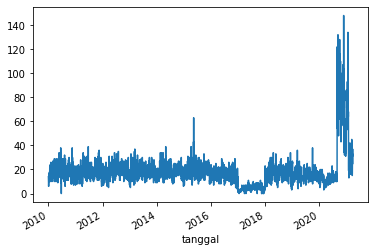

In [207]:
df['no2'].plot();

In [29]:
target_names = ['pm10', 'so2', 'co', 'o3', 'no2']

In [30]:
shift_steps = 1

In [58]:
df_targets = df[target_names].shift(-shift_steps)

In [59]:
df[target_names].head(shift_steps + 5)

,pm10,so2,co,o3,no2
tanggal,,,,,
2010-01-01,60,4,73.0,27,14
2010-01-02,32,2,16.0,33,9
2010-01-03,27,2,19.0,20,9
2010-01-04,22,2,16.0,15,6
2010-01-05,25,2,17.0,15,8
2010-01-06,30,3,22.0,19,11


In [60]:
df_targets.head(5)

,pm10,so2,co,o3,no2
tanggal,,,,,
2010-01-01,32.0,2.0,16.0,33.0,9.0
2010-01-02,27.0,2.0,19.0,20.0,9.0
2010-01-03,22.0,2.0,16.0,15.0,6.0
2010-01-04,25.0,2.0,17.0,15.0,8.0
2010-01-05,30.0,3.0,22.0,19.0,11.0


In [61]:
df_targets.tail()

,pm10,so2,co,o3,no2
tanggal,,,,,
2021-03-27,57.0,43.0,15.0,71.0,31.0
2021-03-28,65.0,48.0,19.0,67.0,37.0
2021-03-29,59.0,42.0,15.0,55.0,30.0
2021-03-30,56.0,43.0,18.0,48.0,25.0
2021-03-31,NaN,NaN,NaN,NaN,NaN


In [62]:
x_data = df.values[0:-shift_steps]

In [63]:
print(type(x_data))
print("Shape:", x_data.shape)

<class 'numpy.ndarray'>
Shape: (4087, 6)


In [64]:
y_data = df_targets.values[:-shift_steps]

In [65]:
print(type(y_data))
print("Shape:", y_data.shape)

<class 'numpy.ndarray'>
Shape: (4087, 5)


In [66]:
num_data = len(x_data)
num_data

4087

In [67]:
train_split = 0.9

In [68]:
num_train = int(train_split * num_data)
num_train

3678

In [69]:
num_test = num_data - num_train
num_test

409

In [70]:
x_train = x_data[0:num_train]
x_test = x_data[num_train:]
len(x_train) + len(x_test)

4087

In [71]:
y_train = y_data[0:num_train]
y_test = y_data[num_train:]
len(y_train) + len(y_test)

4087

In [72]:
num_x_signals = x_data.shape[1]
num_x_signals

6

In [73]:
num_y_signals = y_data.shape[1]
num_y_signals

5

In [74]:
print("Min:", np.min(x_train))
print("Max:", np.max(x_train))

Min: 0.0
Max: 314.0


In [75]:
x_scaler = MinMaxScaler()

In [76]:
x_train_scaled = x_scaler.fit_transform(x_train)

In [77]:
print("Min:", np.min(x_train_scaled))
print("Max:", np.max(x_train_scaled))

Min: 0.0
Max: 1.0


In [78]:
x_test_scaled = x_scaler.transform(x_test)

In [79]:
y_scaler = MinMaxScaler()
y_train_scaled = y_scaler.fit_transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [80]:
print(x_train_scaled.shape)
print(y_train_scaled.shape)

(3678, 6)
(3678, 5)


In [81]:
def batch_generator(batch_size, sequence_length):
    """
    Generator function for creating random batches of training-data.
    """

    # Infinite loop.
    while True:
        # Allocate a new array for the batch of input-signals.
        x_shape = (batch_size, sequence_length, num_x_signals)
        x_batch = np.zeros(shape=x_shape, dtype=np.float16)

        # Allocate a new array for the batch of output-signals.
        y_shape = (batch_size, sequence_length, num_y_signals)
        y_batch = np.zeros(shape=y_shape, dtype=np.float16)

        # Fill the batch with random sequences of data.
        for i in range(batch_size):
            # Get a random start-index.
            # This points somewhere into the training-data.
            idx = np.random.randint(num_train - sequence_length)
            
            # Copy the sequences of data starting at this index.
            x_batch[i] = x_train_scaled[idx:idx+sequence_length]
            y_batch[i] = y_train_scaled[idx:idx+sequence_length]
        
        yield (x_batch, y_batch)

In [82]:
batch_size = 128

In [187]:
sequence_length = 366

In [188]:
generator = batch_generator(batch_size=batch_size,
                            sequence_length=sequence_length)

In [189]:
x_batch, y_batch = next(generator)

In [190]:
print(x_batch.shape)
print(y_batch.shape)

(128, 366, 6)
(128, 366, 5)


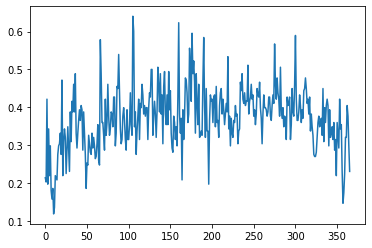

In [191]:
batch = 0   # First sequence in the batch.
signal = 0  # First signal from the 20 input-signals.
seq = x_batch[batch, :, signal]
plt.plot(seq)

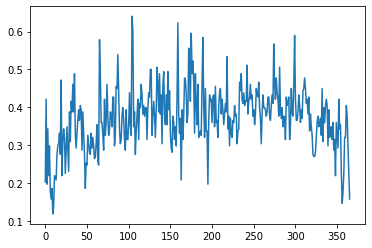

In [192]:
seq = y_batch[batch, :, signal]
plt.plot(seq)

In [193]:
validation_data = (np.expand_dims(x_test_scaled, axis=0),
                   np.expand_dims(y_test_scaled, axis=0))

In [194]:
model = tf.keras.models.Sequential([
  tf.keras.layers.GRU(units=128,
                      return_sequences=True,
                      input_shape=(None, num_x_signals,)),
  tf.keras.layers.Dense(num_y_signals, activation='sigmoid')
])

In [195]:
if False:
    from tensorflow.python.keras.initializers import RandomUniform

    # Maybe use lower init-ranges.
    init = RandomUniform(minval=-0.05, maxval=0.05)

    model.add(Dense(num_y_signals,
                    activation='linear',
                    kernel_initializer=init))

In [196]:
warmup_steps = 50

In [197]:
def loss_mse_warmup(y_true, y_pred):
    """
    Calculate the Mean Squared Error between y_true and y_pred,
    but ignore the beginning "warmup" part of the sequences.
    
    y_true is the desired output.
    y_pred is the model's output.
    """

    # The shape of both input tensors are:
    # [batch_size, sequence_length, num_y_signals].

    # Ignore the "warmup" parts of the sequences
    # by taking slices of the tensors.
    y_true_slice = y_true[:, warmup_steps:, :]
    y_pred_slice = y_pred[:, warmup_steps:, :]

    # These sliced tensors both have this shape:
    # [batch_size, sequence_length - warmup_steps, num_y_signals]

    # Calculat the Mean Squared Error and use it as loss.
    mse = tf.keras.backend.mean(tf.keras.backend.square(y_true_slice - y_pred_slice))
    
    return mse

In [198]:
optimizer = tf.keras.optimizers.RMSprop(lr=1e-3)

In [199]:
model.compile(loss=loss_mse_warmup, optimizer=optimizer)

In [200]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_5 (GRU)                  (None, None, 128)         52224     
_________________________________________________________________
dense_4 (Dense)              (None, None, 5)           645       
Total params: 52,869
Trainable params: 52,869
Non-trainable params: 0
_________________________________________________________________


In [201]:
path_checkpoint = '23_checkpoint.keras'
callback_checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath=path_checkpoint,
                                      monitor='val_loss',
                                      verbose=1,
                                      save_weights_only=True,
                                      save_best_only=True)

In [202]:
callback_early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                           patience=5, verbose=1)

In [203]:
callback_tensorboard = tf.keras.callbacks.TensorBoard(log_dir='./23_logs/',
                                                      histogram_freq=0,
                                                      write_graph=False)

In [204]:
callback_reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',
                                                          factor=0.1,
                                                          min_lr=1e-4,
                                                          patience=0,
                                                          verbose=1)

In [205]:
callbacks = [callback_early_stopping,
             callback_checkpoint,
             callback_tensorboard,
             callback_reduce_lr]

In [206]:
%%time
model.fit(x=generator,
          epochs=20,
          steps_per_epoch=100,
          validation_data=validation_data,
          callbacks=callbacks)

Epoch 1/20
100/100 [==============================] - ETA: 0s - batch: 49.5000 - size: 128.0000 - loss: 0.0150

/home/nusa/.local/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '



Epoch 00001: val_loss improved from inf to 0.07833, saving model to 23_checkpoint.keras
100/100 [==============================] - 26s 250ms/step - batch: 49.5000 - size: 128.0000 - loss: 0.0150 - val_loss: 0.0783
Epoch 2/20
100/100 [==============================] - ETA: 0s - batch: 49.5000 - size: 128.0000 - loss: 0.0088
Epoch 00002: val_loss improved from 0.07833 to 0.06910, saving model to 23_checkpoint.keras
100/100 [==============================] - 24s 241ms/step - batch: 49.5000 - size: 128.0000 - loss: 0.0088 - val_loss: 0.0691
Epoch 3/20
100/100 [==============================] - ETA: 0s - batch: 49.5000 - size: 128.0000 - loss: 0.0075
Epoch 00003: val_loss improved from 0.06910 to 0.06395, saving model to 23_checkpoint.keras
100/100 [==============================] - 24s 244ms/step - batch: 49.5000 - size: 128.0000 - loss: 0.0075 - val_loss: 0.0640
Epoch 4/20
100/100 [==============================] - ETA: 0s - batch: 49.5000 - size: 128.0000 - loss: 0.0070
Epoch 00004: val

In [155]:
try:
    model.load_weights(path_checkpoint)
except Exception as error:
    print("Error trying to load checkpoint.")
    print(error)

In [156]:
result = model.evaluate(x=np.expand_dims(x_test_scaled, axis=0),
                        y=np.expand_dims(y_test_scaled, axis=0))

In [157]:
print("loss (test-set):", result)

loss (test-set): 0.04894747957587242


In [158]:
# If you have several metrics you can use this instead.
if False:
    for res, metric in zip(result, model.metrics_names):
        print("{0}: {1:.3e}".format(metric, res))

In [159]:
def plot_comparison(start_idx, length=100, train=True):
    """
    Plot the predicted and true output-signals.
    
    :param start_idx: Start-index for the time-series.
    :param length: Sequence-length to process and plot.
    :param train: Boolean whether to use training- or test-set.
    """
    
    if train:
        x = x_train_scaled
        y_true = y_train
    else:
        x = x_test_scaled
        y_true = y_test
    
    end_idx = start_idx + length
    
    x = x[start_idx:end_idx]
    y_true = y_true[start_idx:end_idx]
    
    x = np.expand_dims(x, axis=0)

    y_pred = model.predict(x)
    
    y_pred_rescaled = y_scaler.inverse_transform(y_pred[0])
    
    for signal in range(len(target_names)):
        signal_pred = y_pred_rescaled[:, signal]
        
        signal_true = y_true[:, signal]

        plt.figure(figsize=(15,5))
        
        plt.plot(signal_true, label='true')
        plt.plot(signal_pred, label='pred')
        
        p = plt.axvspan(0, warmup_steps, facecolor='black', alpha=0.15)
        
        plt.ylabel(target_names[signal])
        plt.legend()
        plt.show()

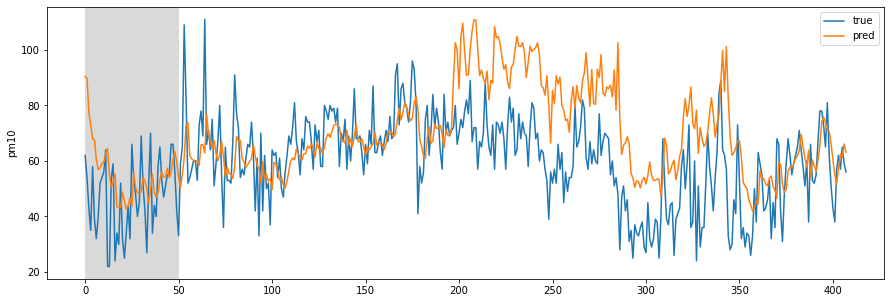

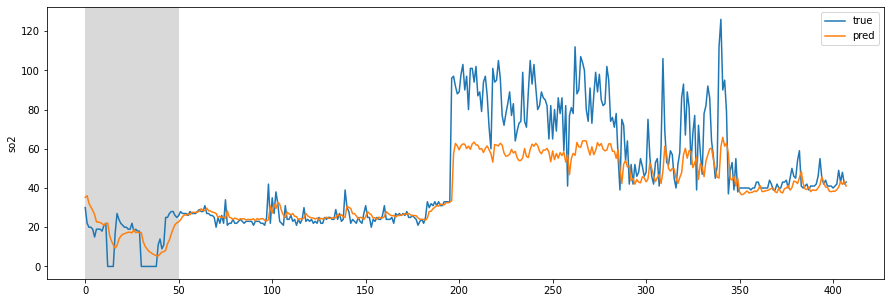

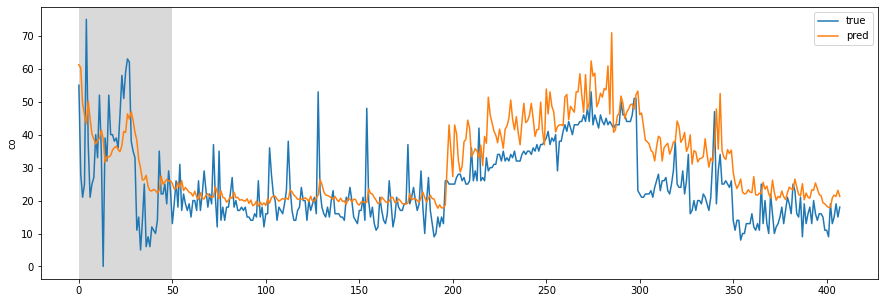

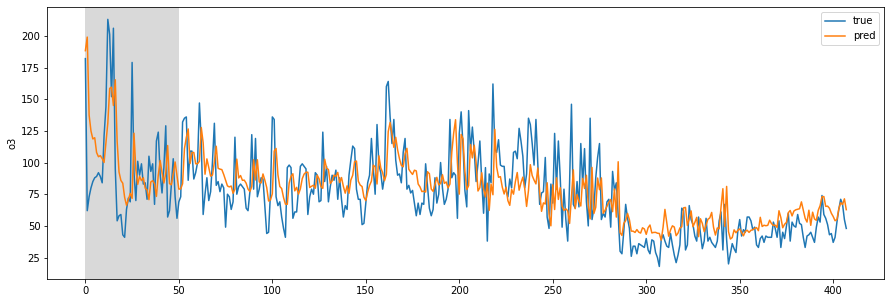

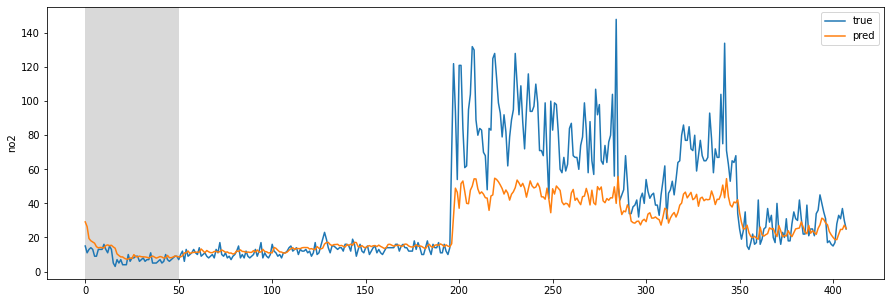

In [166]:
plot_comparison(start_idx=1, length=1000, train=False)